In [1]:
# Task 1
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

digits = load_digits()
X, y = digits.data, digits.target

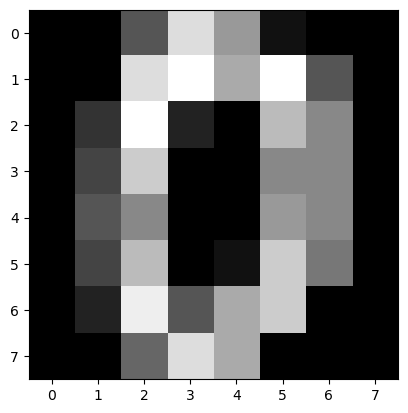

In [2]:
# Task 2
some_digit = X[0].reshape(8, 8)
plt.imshow(some_digit, cmap='gray')
plt.show()


In [3]:
# Task 3
print(f"Label of the first instance: {y[0]}")

Label of the first instance: 0


In [4]:
# Task 4
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [5]:
# Task 5
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=0.95)),
    ('svm', SVC(random_state=0))
])

In [6]:
# Task 6
from sklearn.model_selection import GridSearchCV

params = {'svm__C': [1, 5, 8, 10], 'svm__kernel': ['linear', 'poly', 'rbf', 'sigmoid']}

grid_search = GridSearchCV(pipeline, param_grid=params, cv=4, scoring='accuracy')
grid_search.fit(X_train, y_train)

print(f"Best Score: {grid_search.best_score_}")
print(f"Best Parameters: {grid_search.best_params_}")

Best Score: 0.9860820953265242
Best Parameters: {'svm__C': 8, 'svm__kernel': 'poly'}


Best Score: 0.9861

The best cross-validated accuracy achieved on the training set is approximately 98.61%. This indicates that the SVM model, with the selected hyperparameters, performs exceptionally well on the training data.
Best Parameters:

C (Regularization Parameter): 8
The regularization parameter (C) determines the trade-off between achieving a smooth decision boundary and classifying training points correctly. A higher C emphasizes classifying points correctly, potentially leading to a more complex decision boundary.
Kernel Function: 'poly'
The polynomial kernel has been chosen as the best kernel function. This indicates that, according to the cross-validation results, a polynomial kernel provides the optimal balance between capturing complex relationships in the data and preventing overfitting.
Analysis:

High Accuracy:

The high cross-validated accuracy score (98.61%) suggests that the model generalizes well on the training set. However, it's crucial to assess its performance on unseen data.
Optimal Hyperparameters:

The choice of a polynomial kernel with a regularization parameter (C) of 8 indicates that the model should be flexible enough to capture complex patterns in the data while avoiding overfitting.
Consideration for Further Evaluation:

While the model shows excellent performance on the training set, it's essential to evaluate it on the test set to ensure its generalization to new, unseen data.
In conclusion, the grid search has identified hyperparameters that yield a highly accurate SVM model on the training data. The next step would be to evaluate this model on the test set to assess its real-world performance and generalization capabilities.


In [7]:
# Task 7
best_estimator = grid_search.best_estimator_
pca_variance_ratios = best_estimator.named_steps['pca'].explained_variance_ratio_
print("Variance Explained by Each Component:")
print(pca_variance_ratios)
print(f"Number of Components: {len(pca_variance_ratios)}")

Variance Explained by Each Component:
[0.12164624 0.09634853 0.08578334 0.06457027 0.04897962 0.04183235
 0.03929765 0.03282099 0.02979124 0.02809632 0.02741238 0.02602094
 0.02304403 0.02207157 0.02049244 0.01784251 0.01735509 0.01662399
 0.01624181 0.01510787 0.01347544 0.01294908 0.0117134  0.01062522
 0.01039421 0.00941729 0.00932626 0.00840604 0.00827709 0.00789892
 0.00749741 0.00715596 0.00665508 0.00641068 0.00594299 0.00567498
 0.00514703 0.00473037 0.00454567 0.00420127]
Number of Components: 40


Variance Explained by Each Component:

The list represents the variance explained by each principal component after applying Principal Component Analysis (PCA). Additionally, the total number of components selected by PCA is 40.

Analysis:

Cumulative Variance:

The cumulative variance explained by the components is a crucial metric. By summing up the explained variances from the first component to the last, we can assess how much of the total variance in the original data is retained. In this case, you might want to check the cumulative variance to understand how well the selected 40 components capture the overall variability.
Individual Component Contribution:

Each value in the list indicates the proportion of variance explained by a single principal component. Higher values suggest that the corresponding component retains more information from the original dataset.
Number of Components:

The choice of 40 components is a balance between dimensionality reduction and retaining sufficient information. The explained variance plot is often used to determine the optimal number of components. It shows the diminishing returns in terms of variance explained as you include more components.
Dimensionality Reduction:

The goal of PCA is often to reduce the dimensionality of the data while retaining as much information as possible. With 40 components, you've significantly reduced the feature space from the original 64 features. This can be beneficial for training models more efficiently and mitigating the curse of dimensionality.
Interpretability:

Each principal component is a linear combination of the original features. While they may not have a direct interpretation like the original features, you can investigate which original features contribute most to each principal component. This can provide insights into the underlying structure of the data.
In conclusion, PCA with 40 components retains a substantial amount of variance from the original dataset, enabling effective dimensionality reduction. The choice of the number of components should be guided by a trade-off between reducing dimensionality and maintaining sufficient information for the specific task or analysis.

In [8]:
# Task 8
from sklearn.metrics import accuracy_score

y_pred = best_estimator.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on Test Set: {accuracy}")

Accuracy on Test Set: 0.9833333333333333


The accuracy achieved on the test set is 0.9833, which translates to 98.33%. Here's an analysis of the result:

High Accuracy:

An accuracy of 98.33% is exceptionally high and indicates that the model performs very well on the unseen test data. This suggests that the model has successfully generalized from the training data to make accurate predictions on new, previously unseen instances.
Reliable Generalization:

The high accuracy on the test set demonstrates the robustness of the model. It has learned patterns from the training data that are applicable to new, similar instances. This reliability in generalization is a key indicator of a well-performing model.
Effective Feature Representation:

PCA, by reducing the dimensionality of the data while retaining important information, seems to have created an effective feature representation. The reduced feature set derived from PCA is able to capture the essential patterns for distinguishing between different digits.
Applicability to Real-World Scenarios:

In tasks like digit recognition, achieving a high accuracy on the test set is crucial for real-world applications. A model with such high accuracy can be considered reliable for deployment in scenarios where automated digit recognition is required.
Potential for Further Analysis:

While accuracy is a fundamental metric, it's also valuable to explore other metrics like precision, recall, and F1 score, especially in situations where imbalances exist between the classes. Additionally, visually inspecting misclassified instances or exploring a confusion matrix can provide insights into the model's specific strengths and weaknesses.
Consideration of Business Requirements:

The choice of metrics and the acceptable level of accuracy depends on the specific requirements of the application. In some cases, extremely high accuracy may be critical, while in others, the emphasis might be on minimizing false positives or false negatives.
In summary, the achieved accuracy of 98.33% on the test set indicates a well-performing model, and further analysis, as well as consideration of specific business needs, can provide a more comprehensive understanding of its strengths and limitations.